## Create FRF Bathymetry Files 2D & 1D
------


In [4]:
%matplotlib inline
import scipy
import numpy as np
import os, re
from scipy.interpolate import griddata, interp2d, interp1d
import matplotlib.pyplot as plt

In [5]:
ProjectDir = os.getcwd()  # get current path
FolderName = 'DEPTH_FILES' # folder name where DEPTH files are stored
DepthDir = os.path.join(ProjectDir,FolderName) # path to FolderName


# Upload FRF bathymetry with 10m resolution
Depth10m = np.loadtxt(os.path.join(DepthDir,'depth_for_funwave_10x10m.txt')).T# 10m resolution bathymetry
[Depth10mNy,Depth10mNx] = np.shape(Depth10m) # x = number of columns in Depth10m and y = number of rows in Depth10m 
Depth10mDx = 10.0 
Depth10mDy = 10.0
Depth10mX = np.arange(62.483, 612.483,Depth10mDx)
Depth10mY = np.arange(0.0,Depth10mNy*Depth10mDy,Depth10mDy)

# Upload Oct 1 profile
OldProfile = np.loadtxt(os.path.join(DepthDir,'depth_1D_2015-10-01.txt')) *-1
OldDx = 1.0 
xOld = np.arange(0,len(OldProfile[1,:])*OldDx,OldDx)
OldProfileIntersect = 430.0 #or 555.0 OldProfile intersect to Depth10m

# Upload LIDAr Foreshores by date  
foreshoreDir = os.path.join(DepthDir,'MEAN_FORESHORE') # import foreshore x & z vectors for each date
foreshoreList = []
XforeshoreList = []

for f in os.listdir((foreshoreDir)):
    if re.match('Foreshore', f):
        foreshoreList.append(f)
    elif re.match('Xforeshore', f):
        XforeshoreList.append(f)

foreshoreList = sorted(foreshoreList)
XforeshoreList = sorted(XforeshoreList)

# Upload foreshore - bathy intersect by date
ForeshoreIntersect = np.loadtxt(os.path.join(DepthDir,'foreshore_bathy_intersec.txt'))  

# Final Bathy grid resolution 
newDx = 1.0 
newDy = 2.0 

loading date: 2015100500
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/1D_profiles/depth1D_1188mglob_2015100500.txt
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/2D_profiles/depth2D_1288mglob_256nglob_2015100500.png
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/2D_profiles/depth2D_1288mglob_256nglob_2015100500.txt 

loading date: 2015100501
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/1D_profiles/depth1D_1188mglob_2015100501.txt
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/2D_profiles/depth2D_1288mglob_256nglob_2015100501.png
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/2D_profiles/depth2D_1288mglob_256nglob_2015100501.txt 

loading date: 2015100502
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/1D_profiles/depth1D_1188mglob_2015100502.txt
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/2D_profiles/depth2D_1288mglob_256nglob_2015100502.png
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/2D_profiles/depth2D_1288mglob_256nglob_201510050

Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/2D_profiles/depth2D_1288mglob_256nglob_2015100603.png
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/2D_profiles/depth2D_1288mglob_256nglob_2015100603.txt 

loading date: 2015100604
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/1D_profiles/depth1D_1188mglob_2015100604.txt
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/2D_profiles/depth2D_1288mglob_256nglob_2015100604.png
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/2D_profiles/depth2D_1288mglob_256nglob_2015100604.txt 

loading date: 2015100605
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/1D_profiles/depth1D_1188mglob_2015100605.txt
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/2D_profiles/depth2D_1288mglob_256nglob_2015100605.png
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/2D_profiles/depth2D_1288mglob_256nglob_2015100605.txt 

loading date: 2015100606
Saving File: /Users/rdchlgs8/Desktop/FRF/bathymetry/1D_profiles/depth1D_1188mglob_2015100

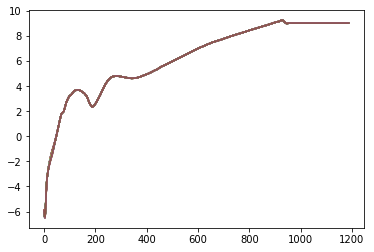

In [6]:
for i in range(len(foreshoreList)):  
    date = foreshoreList[i][10:21].replace("-", "") 
    print('loading date:',date)
    
    OriginalForeshore = np.loadtxt(os.path.join(foreshoreDir,foreshoreList[i]))
    OriginalXforeshore = np.loadtxt(os.path.join(foreshoreDir,XforeshoreList[i]))
    
    nonNanForshoreIndex = int(np.argwhere(np.isfinite(OriginalForeshore[:30]))[0]) # index where finite values start in foreshore
    foreshore = OriginalForeshore[nonNanForshoreIndex:]
    Xforeshore = OriginalXforeshore[nonNanForshoreIndex:]
    
    # find foreshore - bathy intercept index
    ForeshoreIndex = np.argmin(abs(Xforeshore-ForeshoreIntersect[i])) # index of closest value to intercept in Xforeshore vector
    BathyIndex = np.argmin(abs(Depth10mX-ForeshoreIntersect[i])) # index of closest value to intercept in Depth10mX
    
    xConcatenateForeshore2Depth10m = np.concatenate((Xforeshore[:ForeshoreIndex], Depth10mX[BathyIndex:]), axis=0) # concatenate vector sections
    
    DepthConcatenateForeshore2Depth10m = np.zeros([Depth10mNy,len(xConcatenateForeshore2Depth10m)]) # concatenate forshore to Depth10m cross-shore profiles
    for j in range(Depth10mNy):
        DepthConcatenateForeshore2Depth10m[j,:] = np.concatenate((foreshore[:ForeshoreIndex], Depth10m[j,BathyIndex:]), axis=0)
    
    f_interp1 = interp2d(xConcatenateForeshore2Depth10m,Depth10mY,DepthConcatenateForeshore2Depth10m, kind='linear')
    
    XinterpOriginal = np.arange(xConcatenateForeshore2Depth10m[0],xConcatenateForeshore2Depth10m[-1],newDx) # original FRF coordinates
    XinterpFunwave = np.arange(0,len(XinterpOriginal)*newDx,newDx) # change to FUNWAVE local coordinates
    Yinterp = np.arange(Depth10mY[0],Depth10mY[-1],newDy)
    
    DepInterp1 = f_interp1(XinterpOriginal,Yinterp)
    
    
    # find ConcatenateForeshore2Depth10m - OldProfile intercept index
    ConcatenateIndex = np.argmin(abs(XinterpFunwave-OldProfileIntersect)) # index of closest value to intercept in Xforeshore vector
    OldIndex = np.argmin(abs(xOld-OldProfileIntersect)) # index of closest value to intercept in Depth10mX
    
    yConcatenate2OldProfile = Yinterp
    xConcatenate2OldProfile = np.concatenate((XinterpFunwave[:ConcatenateIndex], xOld[OldIndex:]), axis=0) # concatenate X vectors
    DepthConcatenate2OldProfile = np.zeros([len(yConcatenate2OldProfile),len(xConcatenate2OldProfile)]) 
    
    # concatenate bathy to Old Profile
    for k in range(len(DepInterp1)):
        DepthConcatenate2OldProfile[k,:] = np.concatenate((DepInterp1[k,:ConcatenateIndex], OldProfile[1,OldIndex:]), axis=0)
        
    (NyConcatenate2OldProfile,NxConcatenate2OldProfile) = DepthConcatenate2OldProfile.shape    
    
    
    ## Save 1D profiles
    Profile = np.zeros([3,NxConcatenate2OldProfile])
    for l in range(3):
        Profile[l,:] = DepthConcatenate2OldProfile[195,:] * -1 
    
    fileOut1D = os.path.join(ProjectDir,'1D_profiles','depth1D_%smglob_%s.txt'%(str(len(xConcatenate2OldProfile)),str(date)))
    print('Saving File:',fileOut1D)
    #np.savetxt(fileOut1D, Profile, fmt='%.6e', delimiter=' ', newline='\n', header='', footer='', comments='! ')
    plt.plot(Profile[1,:])
    
    ## extend offshore for 2D bathy
    OffshoreSecLength = 100.0
    extStart = DepthConcatenate2OldProfile[:,-1]
    xOffshore = np.arange(0,OffshoreSecLength+newDx,newDx) 
    OffshoreProfileNum = int(OffshoreSecLength/newDx)
    
    OffshoreSec = np.zeros([NyConcatenate2OldProfile,OffshoreProfileNum])
    for i in range(OffshoreProfileNum):
        OffshoreSec[:,i] = extStart

    # merge to bathy
    OffshoreDep = np.zeros([NyConcatenate2OldProfile,NxConcatenate2OldProfile+OffshoreProfileNum])
    OffshoreDep[:,:NxConcatenate2OldProfile] = DepthConcatenate2OldProfile
    OffshoreDep[:,NxConcatenate2OldProfile:] = OffshoreSec
    

    (NyExtendedOffshore,NxExtendedOffshore) = OffshoreDep.shape
    LxExtendedOffshore = NxExtendedOffshore*newDx
    LyExtendedOffshore = NyExtendedOffshore*newDy
    xExtendedOffshore = np.linspace(0,LxExtendedOffshore,NxExtendedOffshore)
    yExtendedOffshore = np.linspace(0,LyExtendedOffshore,NyExtendedOffshore)

    ## extend periodic boundary at the north for 2D bathy
    PeriodicSecLength = 100.0
    ProfileStart = OffshoreDep[0,:]
    ProfileEnd = OffshoreDep[-1,:]
    
    # create periodic boundary sections 
    PeriodicSecY = np.array([0,PeriodicSecLength])
    PeriodicProfileNum = len(PeriodicSecY)

    PeriodicSec = np.zeros([PeriodicProfileNum,NxExtendedOffshore])
    PeriodicSec[0,:] = ProfileEnd
    PeriodicSec[1,:] = ProfileStart

    # interpolate 
    f_periodic = interp2d(xExtendedOffshore,PeriodicSecY,PeriodicSec, kind='linear')

    NewPeriodicSecY = np.arange(0,PeriodicSecLength+newDy,newDy)
    NewPeriodicSec = f_periodic(xExtendedOffshore,NewPeriodicSecY)
    
    # merge to FINAL bathy
    FinalDepth = np.zeros([NyExtendedOffshore+len(NewPeriodicSecY),NxExtendedOffshore])
    (FinalNy,FinalNx) = FinalDepth.shape
    FinalLx = FinalNx*newDx
    FinalLy = FinalNy*newDy
    xFinal = np.linspace(0,FinalLx,FinalNx)
    yFinal = np.linspace(0,FinalLy,FinalNy)
    
    FinalDepth[:NyExtendedOffshore,:] = OffshoreDep[:,:]*-1
    FinalDepth[NyExtendedOffshore:,:] = NewPeriodicSec*-1
    
    PeriodicProfile = np.zeros(FinalNx) + (NyExtendedOffshore*newDy)
    OffshoreProfile = np.zeros(FinalNy) + (NxConcatenate2OldProfile*newDx)
    LidarProfile = np.zeros(FinalNx) + (195*newDy)
    
    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(xFinal,PeriodicProfile,':r',linewidth=2)
    plt.plot(OffshoreProfile,yFinal,'--m',linewidth=2)
    plt.plot(xFinal,LidarProfile,'-.w',linewidth=2)
    CS1 = plt.contour(xFinal, yFinal,FinalDepth,21, linewidths=0.5)
    plt.clabel(CS1,inline=1, fontsize=8) # inline controls labels
    
    CS2 = plt.pcolor(xFinal, yFinal,FinalDepth, cmap = 'viridis_r')
    plt.colorbar(CS2) # draw colorbar
    plt.legend(['Periodic Boundary Extension','Offshore Extension','LIDAR'])

    fig_name = os.path.join(ProjectDir,'2D_profiles','depth2D_%smglob_%snglob_%s.png'%(FinalNx,FinalNy,date))
    print('Saving File:',fig_name)
    #plt.savefig(fig_name, dpi=300)
    plt.close(fig)
    
    ## Save 2D Bathy
    fileOut = 'depth2D_%smglob_%snglob_%s.txt'%(FinalNx,FinalNy,date)
    funwaveFilePath = os.path.join(ProjectDir,'2D_profiles',fileOut)
    print('Saving File:',funwaveFilePath,'\n')
    np.savetxt(funwaveFilePath, FinalDepth, fmt='%.6e', delimiter=' ', newline='\n', header='', footer='', comments='! ')
    
    ## Save 1D profiles
    #Profile = np.zeros([3,FinalNx])
    #for l in range(3):
    #    Profile[l,:] = FinalDepth[195,:]
    
    #fileOut1D = os.path.join(ProjectDir,'1D_profiles','depth1D_%smglob_%s.txt'%(str(len(xConcatenate2OldProfile)),str(date)))
    #print('Saving File:',fileOut1D)
    #np.savetxt(fileOut1D, Profile, fmt='%.6e', delimiter=' ', newline='\n', header='', footer='', comments='! ')